In [8]:
!pip install python-mnist

In [9]:
from mnist import MNIST

In [10]:
%run __init__.py

In [11]:
ls ../

Capstone/  python-mnist/


In [12]:
mndata = MNIST('../python-mnist/data/') #bring mnist training set into this notebook
train_x, train_y = mndata.load_training()

In [22]:
len(train_x), len(train_x[0]), len(train_y), type(train_y[0])

(60000, 784, 60000, int)

In [24]:
train_x = np.reshape(train_x,[len(train_x), len(train_x[0])])
train_y = np.array(train_y)

In [25]:
print('The number of features in each 28 by 28 image is ' + str(len(train_x[0])), 
      'and the number images for which we have a real value is ' + str(len(train_y)))
print('The minimum value in the first image is ' + str(min(train_x[0])), 
      'and the maximum value in the image is ' +  str(max(train_x[0])))

The number of features in each 28 by 28 image is 784 and the number images for which we have a real value is 60000
The minimum value in the first image is 0 and the maximum value in the image is 255


In [26]:
print('This dataset has all ten digits, i.e.: 0, 1, 2, ... 8, 9.',
      'The first instances of each of these digits are located as follows: ',
      '0 at 1, 1 at 3, 2 at 5, 3 at 7, 4 at 9, 5 at 11, 6 at 13, 7 at 15, 8 at 17, and 9 at 4.')

This dataset has all ten digits, i.e.: 0, 1, 2, ... 8, 9. The first instances of each of these digits are located as follows:  0 at 1, 1 at 3, 2 at 5, 3 at 7, 4 at 9, 5 at 11, 6 at 13, 7 at 15, 8 at 17, and 9 at 4.


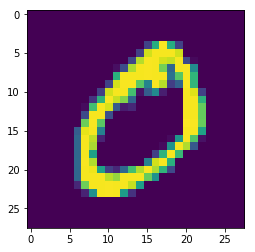

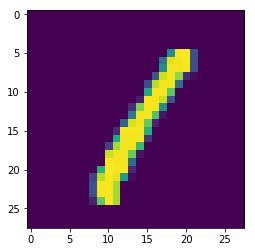

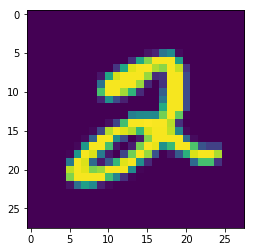

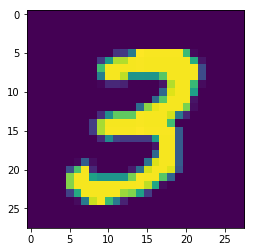

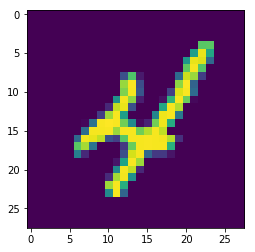

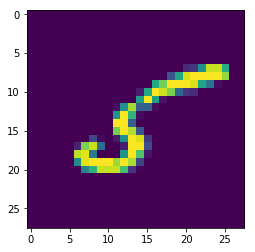

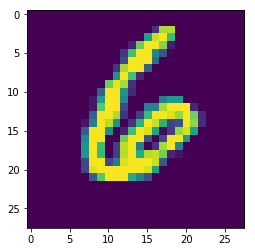

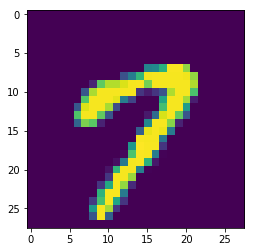

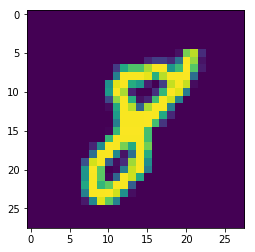

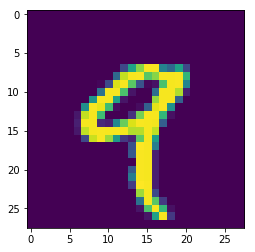

In [27]:
for i in [1, 3, 5, 7, 9, 11, 13, 15, 17, 4]:
    ta = np.array(train_x[i]).reshape((28,28))
    #ta.shape
    plt.imshow(ta)
    plt.show()

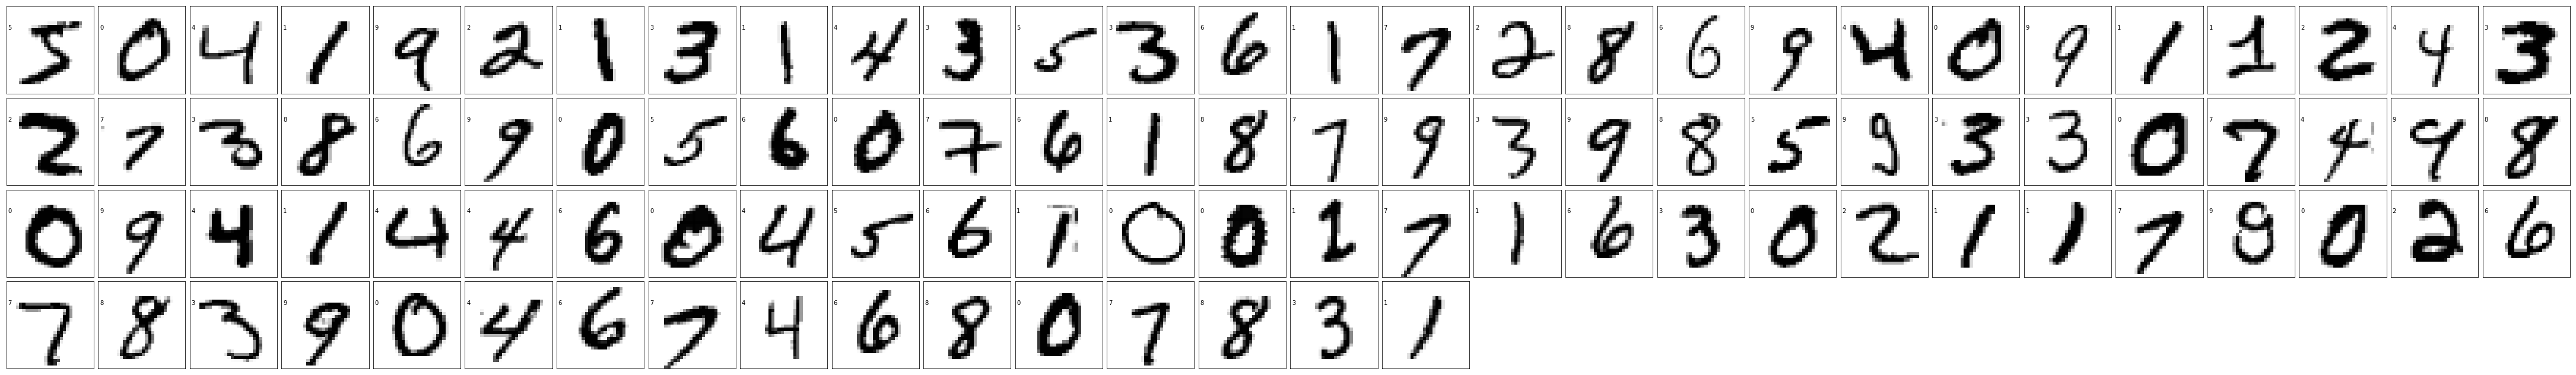

In [41]:
# set up the figure
fig = plt.figure(figsize=(60, 60))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the images: each image is 28x28 pixels. Since they were in a flat array,
#I need to reshape them.
for i in range(100):
    ax = fig.add_subplot(28, 28, i + 1, xticks=[], yticks=[])
    ax.imshow(np.reshape(train_x[i],[28,28]), cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(train_y[i]))
    
plt.show()

In [29]:
first_k = pd.DataFrame(train_x[:1000])
first_k['values'] = np.array(train_y[:1000])
fk_group_description = first_k.groupby('values').describe().T
fk_group_description.T #Note how it looks like most everything is 0.

0      1      2      3      4      5      6      7      8    \
values                                                                        
0      count   97.0   97.0   97.0   97.0   97.0   97.0   97.0   97.0   97.0   
       mean     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
       std      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
       min      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
       25%      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
       50%      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
       75%      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
       max      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1      count  116.0  116.0  116.0  116.0  116.0  116.0  116.0  116.0  116.0   
       mean     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
       std      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
       min      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
       25%      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
       50%      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
       75%      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
       max      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2      count   99.0   99.0   99.0   99.0   99.0   99.0   99.0   99.0   99.0   
       mean     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
       std      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
       min      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
       25%      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
       50%      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
       75%      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
       max      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3      count   93.0   93.0   93.0   93.0   93.0   93.0   93.0   93.0   93.0   
       mean     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
       std      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
       min      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
       25%      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
       50%      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...             ...    ...    ...    ...    ...    ...    ...    ...    ...   
6      std      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
       min      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
       25%      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
       50%      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
       75%      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
       max      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
7      count  117.0  117.0  117.0  117.0  117.0  117.0  117.0  117.0  117.0   
       mean     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
       std      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
       min      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
       25%      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
       50%      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
       75%      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
       max      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
8      count   87.0   87.0   87.0   87.0   87.0   87.0   87.0   87.0   87.0   
       mean     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
       std      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
       min      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0

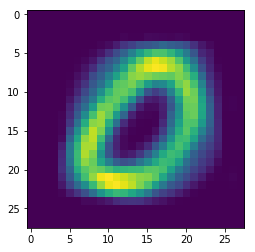

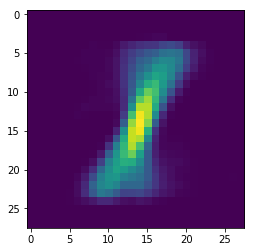

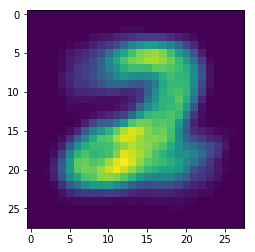

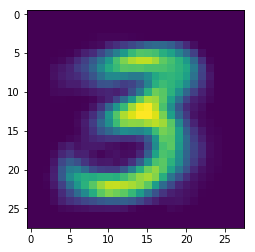

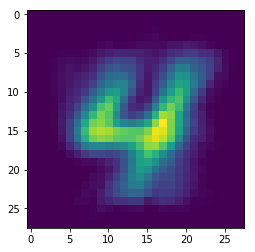

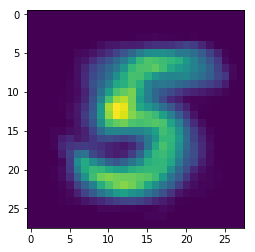

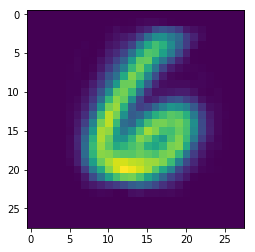

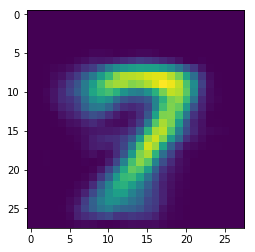

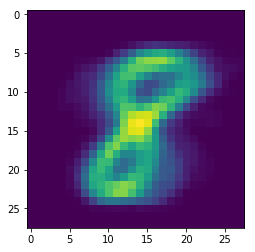

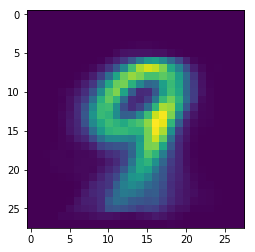

In [83]:
hold_list = []
for value in range(10):
    composite_image = []
    print(value)
    temp_df = first_k[first_k['values'] == value].drop('values', axis = 1)
    hold_list.append(np.array(temp_df.mean(axis = 0)))

for image in hold_list:
    ta = np.array(image).reshape((28,28))
    plt.imshow(ta)
    plt.show() #Clearly there is a lot of variation in images, as expected.

0


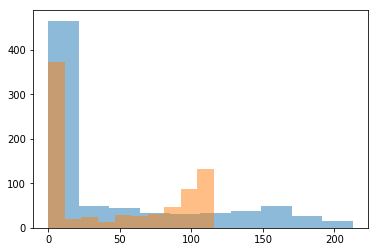

1


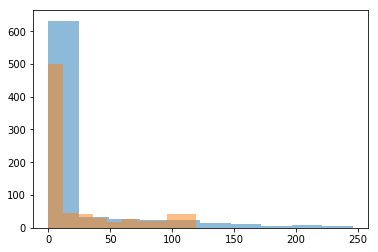

2


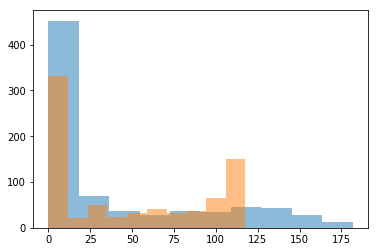

3


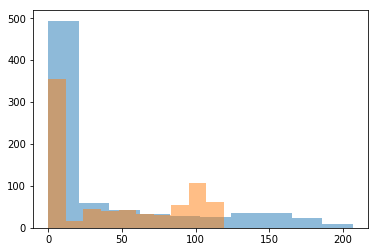

4


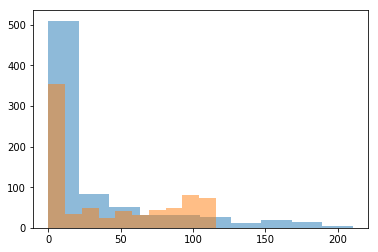

5


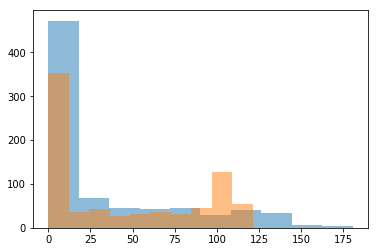

6


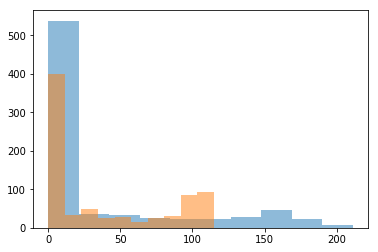

7


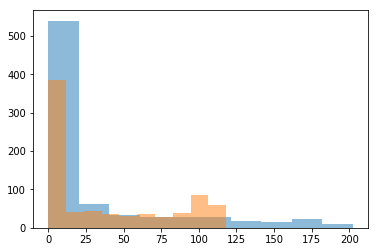

8


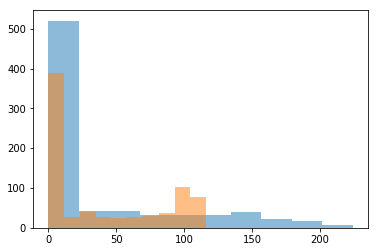

9


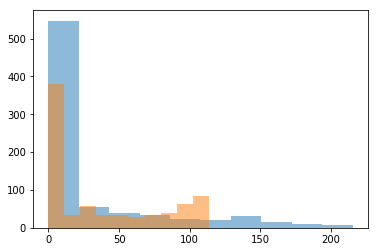

In [84]:
for i in range(10):
    print(i)
    plt.hist(fk_group_description[i]['mean'], alpha=0.5, label='mean')
    plt.hist(fk_group_description[i]['std'], alpha=0.5, label='mean')
    plt.show()

t-SNE: 51 sec


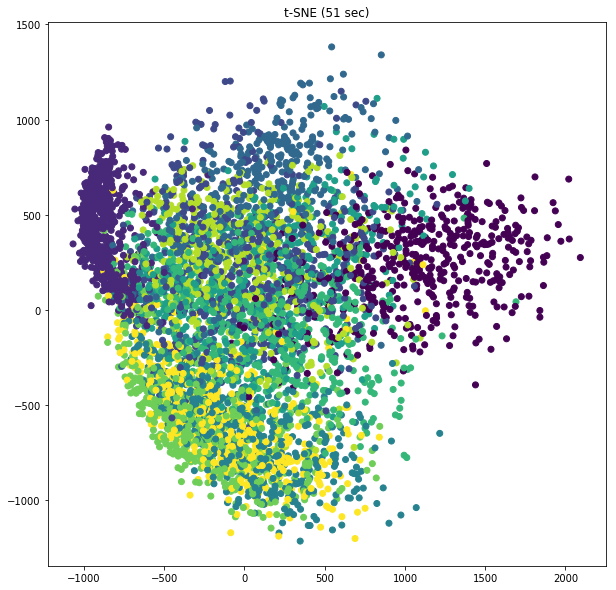

In [9]:
fig = plt.figure(figsize=(10, 10))
t0 = time()
tsne = TSNE(n_components=2, init='pca', random_state=0)
fitted_tsne = tsne.fit_transform(train_x[:5000])
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))
plt.scatter(fitted_tsne[:, 0], fitted_tsne[:, 1], c = train_y[:5000], )
plt.title("t-SNE (%.2g sec)" % (t1 - t0))
plt.axis('tight')
plt.show() 

#It's quite unclear, frankly, which is rather to be expected.
#You can see SOME clustering, but all of them merge somewhat in the middle.

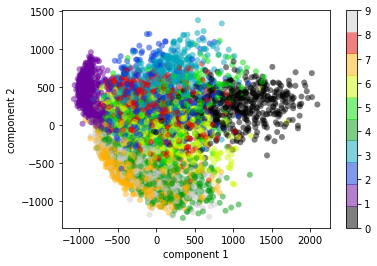

In [47]:
from sklearn.decomposition import PCA
pca = PCA(2)  # project from 784 to 2 dimensions
projected = pca.fit_transform(train_x[:5000])

plt.scatter(projected[:, 0], projected[:, 1],
            c=train_y[:5000], edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();
plt.show() #Basically it's just as ugly as using t-sne.